In [75]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [53]:
folder = "../../../data/config/params/"

r0_new_param = "r0_enhanced_table_10cells.csv"
r0_old_param = "r0_table.csv"

r1_new_param = "r1_enhanced_table_10cells.csv"
r1_old_param = "r1_table.csv"

c_new_param = "c1_enhanced_table_10cells.csv"
c_old_param = "c1_table.csv"

new_params = [r0_new_param, r1_new_param, c_new_param]
old_params = [r0_old_param, r1_old_param, c_old_param]

In [55]:
dfs_new = [pd.read_csv(folder + new_param) for new_param in new_params]
dfs_old = [pd.read_csv(folder + old_param) for old_param in old_params]

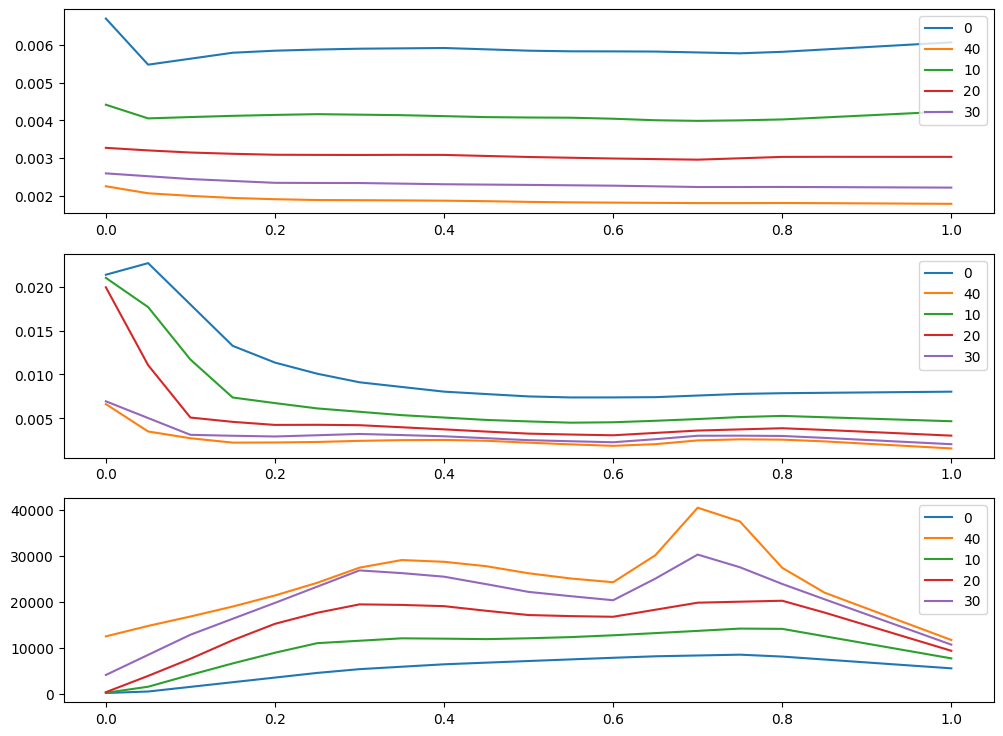

In [104]:
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

temps = set(dfs_old[i]['temp'].values)
for temp in temps:
    axes[0].plot(dfs_old[0][dfs_old[0]['temp'] == temp]['soc'], dfs_old[0][dfs_old[0]['temp'] == temp]['r0'], label=temp) 
    axes[0].legend()
    axes[0].set_title("R0")
    
    axes[1].plot(dfs_old[1][dfs_old[1]['temp'] == temp]['soc'], dfs_old[1][dfs_old[1]['temp'] == temp]['r1'], label=temp) 
    axes[1].legend()
    axes[1].set_title("R1")

    axes[2].plot(dfs_old[2][dfs_old[2]['temp'] == temp]['soc'], dfs_old[2][dfs_old[2]['temp'] == temp]['c'], label=temp) 
    axes[2].legend()
    axes[2].set_title("C")

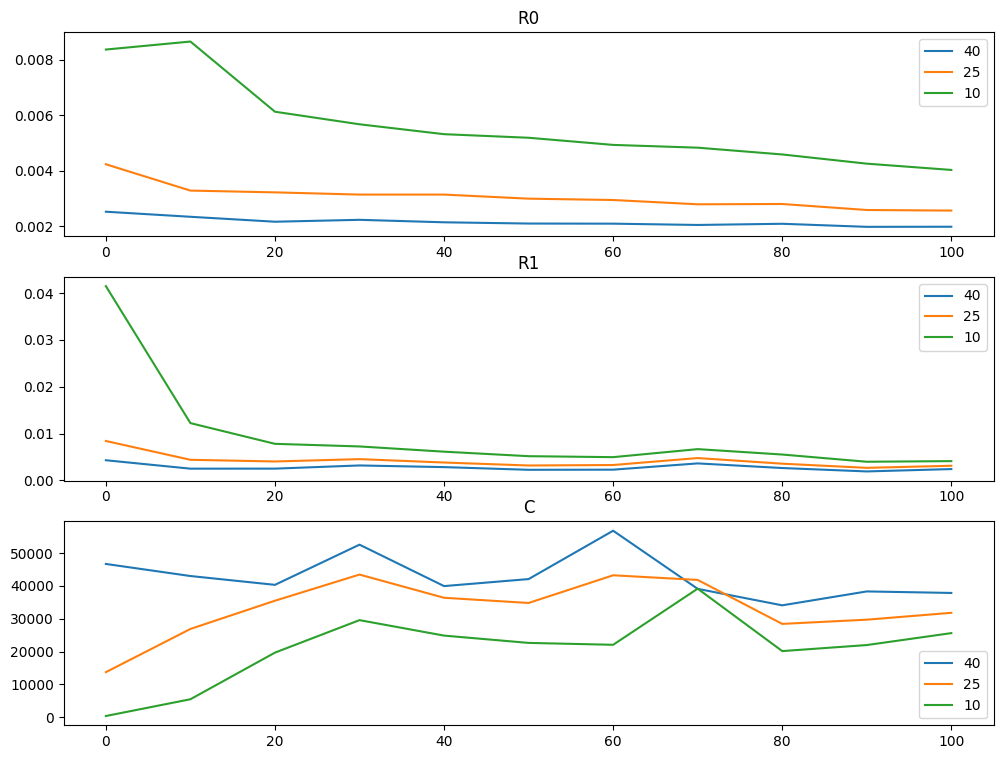

In [106]:
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

temps = set(dfs_new[i]['temp'].values)
for temp in temps:
    axes[0].plot(dfs_new[0][(dfs_new[0]['soh'] == 1.0) & (dfs_new[0]['temp'] == temp)]['soc'], dfs_new[0][(dfs_new[0]['soh'] == 1.0) & (dfs_new[0]['temp'] == temp)]['r0'], label=temp) 
    axes[0].legend()
    axes[0].set_title("R0")
    
    axes[1].plot(dfs_new[1][(dfs_new[1]['soh'] == 1.0) & (dfs_new[0]['temp'] == temp)]['soc'], dfs_new[1][(dfs_new[1]['soh'] == 1.0) & (dfs_new[0]['temp'] == temp)]['r1'], label=temp) 
    axes[1].legend()
    axes[1].set_title("R1")
    
    axes[2].plot(dfs_new[2][(dfs_new[2]['soh'] == 1.0) & (dfs_new[0]['temp'] == temp)]['soc'], dfs_new[2][(dfs_new[2]['soh'] == 1.0) & (dfs_new[0]['temp'] == temp)]['c'], label=temp) 
    axes[2].legend()
    axes[2].set_title("C")

In [56]:
old_vals = [df_old[(df_old['temp'] == 10)] for df_old in dfs_old]

In [60]:
new_vals = [df_new[(df_new['soh'] == 1.0) & (df_new['temp'] == 10)] for df_new in dfs_new]

In [66]:
for new_val in new_vals:
    new_val['soc'] = new_val['soc'].values / 100 

/var/folders/2j/2mbkhb5n5fg0fn1t37btqv140000gn/T/ipykernel_80537/3749863465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_val['soc'] = new_val['soc'].values / 100


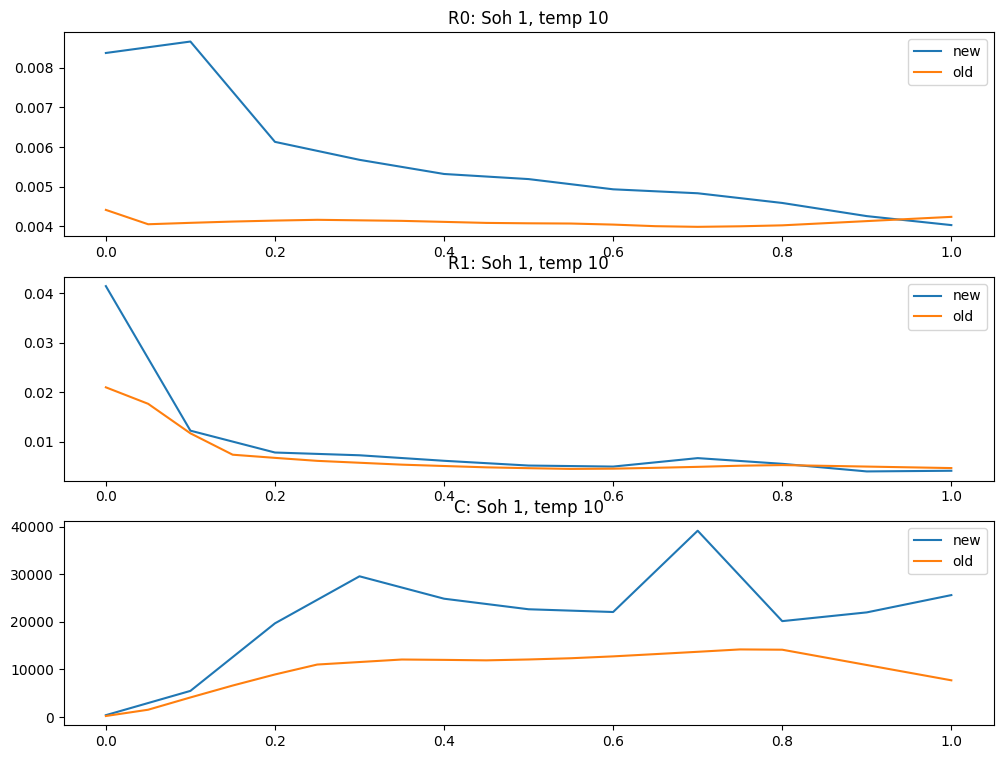

In [107]:
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

axes[0].plot(new_vals[0]['soc'], new_vals[0]['r0'], label='new')
axes[0].plot(old_vals[0]['soc'], old_vals[0]['r0'], label='old')
axes[0].set_title("R0: Soh 1, temp 10")
axes[0].legend()

axes[1].plot(new_vals[1]['soc'], new_vals[1]['r1'], label='new')
axes[1].plot(old_vals[1]['soc'], old_vals[1]['r1'], label='old')
axes[1].set_title("R1: Soh 1, temp 10")
axes[1].legend()

axes[2].plot(new_vals[2]['soc'], new_vals[2]['c'], label='new')
axes[2].plot(old_vals[2]['soc'], old_vals[2]['c'], label='old')
axes[2].set_title("C: Soh 1, temp 10")
axes[2].legend()

### Saving new tables

In [133]:
new_params = [r0_new_param, r1_new_param, c_new_param]
dfs = [pd.read_csv(folder + new_param) for new_param in new_params]

In [134]:
dfs

[     soc        r0  soh  temp
 0      0  0.004236  1.0    25
 1     10  0.003287  1.0    25
 2     20  0.003222  1.0    25
 3     30  0.003143  1.0    25
 4     40  0.003143  1.0    25
 ..   ...       ...  ...   ...
 160   60  0.004188  0.6    40
 161   70  0.004095  0.6    40
 162   80  0.004180  0.6    40
 163   90  0.003959  0.6    40
 164  100  0.003966  0.6    40
 
 [165 rows x 4 columns],
      soc        r1  temp  soh
 0      0  0.008420    25  1.0
 1     10  0.004410    25  1.0
 2     20  0.004050    25  1.0
 3     30  0.004548    25  1.0
 4     40  0.003829    25  1.0
 ..   ...       ...   ...  ...
 160   60  0.004606    40  0.6
 161   70  0.007280    40  0.6
 162   80  0.005302    40  0.6
 163   90  0.003854    40  0.6
 164  100  0.004858    40  0.6
 
 [165 rows x 4 columns],
      soc             c  temp  soh
 0      0  13726.329824    25  1.0
 1     10  26879.856835    25  1.0
 2     20  35476.403080    25  1.0
 3     30  43437.429098    25  1.0
 4     40  36375.394409    

In [135]:
for df in dfs:
    df['soc'] = df['soc'].values / 100 

In [136]:
dfs

[     soc        r0  soh  temp
 0    0.0  0.004236  1.0    25
 1    0.1  0.003287  1.0    25
 2    0.2  0.003222  1.0    25
 3    0.3  0.003143  1.0    25
 4    0.4  0.003143  1.0    25
 ..   ...       ...  ...   ...
 160  0.6  0.004188  0.6    40
 161  0.7  0.004095  0.6    40
 162  0.8  0.004180  0.6    40
 163  0.9  0.003959  0.6    40
 164  1.0  0.003966  0.6    40
 
 [165 rows x 4 columns],
      soc        r1  temp  soh
 0    0.0  0.008420    25  1.0
 1    0.1  0.004410    25  1.0
 2    0.2  0.004050    25  1.0
 3    0.3  0.004548    25  1.0
 4    0.4  0.003829    25  1.0
 ..   ...       ...   ...  ...
 160  0.6  0.004606    40  0.6
 161  0.7  0.007280    40  0.6
 162  0.8  0.005302    40  0.6
 163  0.9  0.003854    40  0.6
 164  1.0  0.004858    40  0.6
 
 [165 rows x 4 columns],
      soc             c  temp  soh
 0    0.0  13726.329824    25  1.0
 1    0.1  26879.856835    25  1.0
 2    0.2  35476.403080    25  1.0
 3    0.3  43437.429098    25  1.0
 4    0.4  36375.394409    

In [138]:
#[df.to_csv(folder + new_param, index=False) for df, new_param in zip(dfs,new_params)]

[None, None, None]